In [1]:
# Image Classification in 10 Minutes with MNIST Dataset

In [2]:
#import libraries
import tensorflow as tf
import keras
import numpy as np

In [3]:
#dataset 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# 50K training images
x_train = x_train[:50000]
y_train = y_train[:50000]

In [6]:
x_train.shape

(50000, 28, 28)

3


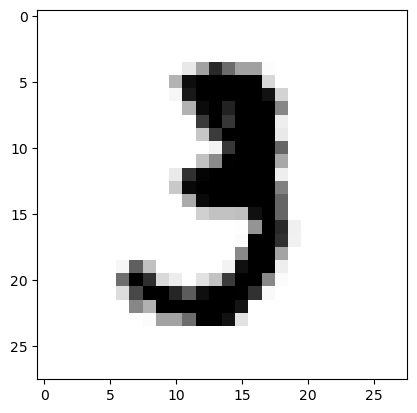

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
print(y_train[10]) # The label is 3
plt.imshow(x_train[10], cmap='Greys')

In [8]:
rotated_X_train=(tf.image.rot90(x_train.reshape(-1,1,28,28), k=2)).numpy().reshape(-1,28,28)

2022-10-12 21:09:02.264580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
rotated_Y_train = y_train

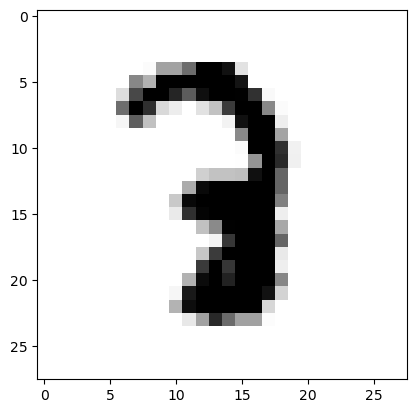

In [10]:
#180 degree turned version of 3
plt.imshow(rotated_X_train[10], cmap='Greys')

In [11]:
#concatanete 2 matrixes
X_train_concat = np.concatenate((x_train, rotated_X_train), axis=0)
Y_train_concat = np.concatenate((y_train, rotated_Y_train), axis=0)
print('x_train shape:', X_train_concat.shape)
print('Number of images in x_train', X_train_concat.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (100000, 28, 28)
Number of images in x_train 100000
Number of images in x_test 10000


In [12]:
#before the odd, array
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
# make 2 classes
y_train[y_train%2 == 0] = 0
y_train[y_train%2 == 1] = 1
y_test[y_test%2 == 0] = 0
y_test[y_test%2 == 1] = 1

In [14]:
y_train[:10]

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=uint8)

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [16]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(2,activation=tf.nn.softmax))

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0982 - accuracy: 0.9633
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0420 - accuracy: 0.9855
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0300 - accuracy: 0.9895
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0212 - accuracy: 0.9927
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0189 - accuracy: 0.9930
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0139 - accuracy: 0.9950
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0126 - accuracy: 0.9958
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0108 - accuracy: 0.9961
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.008

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0458 - accuracy: 0.9894


[0.045806486159563065, 0.9894000291824341]

1/1 [==============================] - 0s 38ms/step
0


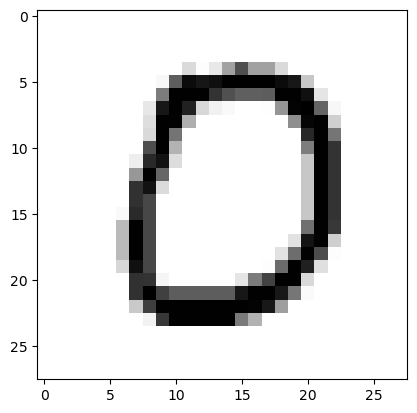

In [19]:
plt.imshow(x_test[10].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[10].reshape(1, 28, 28, 1))
print(pred.argmax())